In [1]:
import tensorflow_hub as tfhub
import tensorflow_text as tftxt
import tensorflow as tf

In [47]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("./data/spam.csv", encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df[["v1", "v2"]]
df.rename(columns={"v1":"category", "v2":"message"}, inplace=True)

df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
df["category"].value_counts()

ham     4825
spam     747
Name: category, dtype: int64

In [7]:
round(df["category"].value_counts()["spam"]/df["category"].value_counts()["ham"],2)

0.15

## Check Null

In [8]:
df.isnull().sum()

category    0
message     0
dtype: int64

## Replace labels with binary counterparts

In [9]:
df['label'] = df["category"].replace({"spam":1, "ham":0})

df.head()

,category,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
## Consider only message and label
model_df = df[["message", "label"]]

model_df.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [10]:
from sklearn.model_selection import train_test_split

In [17]:
df_train, df_test = train_test_split(model_df, train_size=0.80, random_state=42, stratify=model_df["label"])

In [18]:
df_train.shape

(4457, 2)

In [19]:
df_train["label"].value_counts()

0    3859
1     598
Name: label, dtype: int64

In [20]:
df_test.shape

(1115, 2)

In [21]:
df_test["label"].value_counts()

0    966
1    149
Name: label, dtype: int64

## Understanding use of BERT model

In [22]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [24]:
bert_preprocess = tfhub.KerasLayer(preprocess_url)
bert_encoder = tfhub.KerasLayer(encoder_url)

In [25]:
test_text = ["Good movie indeed", "I love Python programming"]

text_preprocessed = bert_preprocess(test_text)

In [26]:
text_preprocessed.keys()

dict_keys(['input_mask', 'input_type_ids', 'input_word_ids'])

In [27]:
## Mostly for Focal Loss function
text_preprocessed['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

In [28]:
## Integer mapping of each words
text_preprocessed['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  2204,  3185,  5262,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [29]:
## Lets call bert model on this preprocessed text
bert_results = bert_encoder(text_preprocessed)

bert_results.keys()

dict_keys(['sequence_output', 'default', 'pooled_output', 'encoder_outputs'])

In [30]:
## pooled_output (2,768)--> Represents embedding for entire sentence 
## Global Average Pooling on every word vector(of dim - 128) of "sequence_output" key
## within a sentence; 2 -> for two sentences, 768 --> representation of 768 abstract features
## We directly use this for other NLP tasks

bert_results['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7895058 , -0.20431206,  0.4131056 , ...,  0.20101456,
        -0.46502224,  0.7900286 ],
       [-0.91709894, -0.47926584, -0.78663105, ..., -0.6176258 ,
        -0.7101896 ,  0.92184716]], dtype=float32)>

In [31]:
## sequence_output - (2,128,768) --> Individual word embeddings of every word in a sentence 
## across 768 abstact features - contextualized word vectors
## 2 --> only 2 sentences
## 128 (default) --> sequence_length; max_length=512

bert_results['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 5.93400933e-02,  1.20564036e-01,  1.80374235e-01, ...,
         -8.06351379e-02,  1.32378519e-01,  1.55150332e-02],
        [-3.78345191e-01,  4.41926628e-01,  4.64997768e-01, ...,
         -2.52495617e-01,  5.59761226e-01, -6.22169077e-01],
        [ 1.62994787e-01, -3.82888794e-01, -3.49523485e-01, ...,
         -2.70137161e-01,  7.98969343e-03, -7.29888082e-01],
        ...,
        [ 9.06447470e-02,  1.81277797e-01,  4.00425464e-01, ...,
          1.36284083e-01,  2.40565389e-01,  1.53446466e-01],
        [ 2.51968801e-02,  6.39203005e-04,  4.96825993e-01, ...,
          2.05283135e-01,  2.67219722e-01, -6.34996146e-02],
        [-1.00567743e-01, -2.60194153e-01,  5.52420616e-01, ...,
          5.63074529e-01,  2.18655080e-01, -2.22517341e-01]],

       [[-7.87319690e-02,  3.63226295e-01, -2.11012974e-01, ...,
         -1.71596497e-01,  1.63150668e-01,  6.72125876e-01],
        [ 2.79461086e-01,  4.37371939e-01, -3.57

In [35]:
## encoder_outputs ==> these are the layers of encoders used in this bert_base model --> 12 layers
print("Number of encoding layers(== # of encoded outputs): ", len(bert_results['encoder_outputs']))

## Each layer provides (2, 128,768) contextualized word embedding outputs
print("Encoded Output (Layer 1)")
print(bert_results["encoder_outputs"][0])

## Last layer output == bert_results['sequence_output']
print("Encoded Output (Layer 12)")
print(bert_results["encoder_outputs"][-1])

Number of encoding layers(== # of encoded outputs):  12
Encoded Output (Layer 1)
tf.Tensor(
[[[ 1.56760603e-01  3.86596322e-02 -2.72189751e-02 ...  4.43690643e-02
    3.25059928e-02  2.67636031e-04]
  [ 6.81112885e-01  7.91165531e-01 -1.11127526e-01 ... -5.95716536e-01
   -1.09887004e+00 -1.93055952e+00]
  [ 3.33087534e-01  6.65187716e-01 -4.93981928e-01 ...  2.15896443e-02
    3.97989154e-01 -1.27452910e+00]
  ...
  [-6.59928396e-02 -2.35640988e-01  6.98154449e-01 ...  4.69457269e-01
   -2.29550973e-01  1.29796490e-01]
  [-1.32729053e-01 -2.68185347e-01  5.62804043e-01 ...  4.88162696e-01
   -1.60438418e-01  8.98454338e-03]
  [-2.27594264e-02 -1.91847593e-01  5.81588209e-01 ...  7.69649148e-01
   -4.32761371e-01 -3.93359438e-02]]

 [[ 1.89115837e-01  2.74398103e-02 -6.50790483e-02 ... -6.18333369e-03
    1.50548458e-01  3.15822810e-02]
  [ 5.91498673e-01  7.59010613e-01 -7.23812655e-02 ...  6.19188905e-01
    8.29147041e-01  1.61931962e-01]
  [ 1.44605184e+00  4.46195036e-01  4.096523

In [36]:
## create a function that generated pooled_output sentence embeddings
def get_sent_embeddings(txt_list):
    ## First preprocess - Adding start(CLS)/end(SEP) tokens, masking
    preprocessed_text = bert_preprocess(txt_list)
    
    ## Convert to sentence embeddings
    return bert_encoder(preprocessed_text)['pooled_output']

In [39]:
## Lets try out the function
rand_words = ['banana', 'mango', 'apple', 'jeff bezos', 'elon musk', 'noble varghese']
results = get_sent_embeddings(rand_words)
results

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.76051193, -0.1421029 ,  0.4961568 , ...,  0.42178705,
        -0.5321054 ,  0.80295026],
       [-0.7126569 , -0.15459532,  0.3832294 , ...,  0.35239327,
        -0.5099291 ,  0.734623  ],
       [-0.8196573 , -0.29626265,  0.20916894, ...,  0.255629  ,
        -0.5875619 ,  0.8435542 ],
       [-0.8252952 , -0.35545605, -0.5904593 , ..., -0.01626256,
        -0.61419106,  0.8724024 ],
       [-0.75018764, -0.26784304, -0.26641887, ...,  0.02857569,
        -0.59357804,  0.797525  ],
       [-0.81616974, -0.3588926 , -0.34416583, ..., -0.2067192 ,
        -0.5662619 ,  0.7163663 ]], dtype=float32)>

In [40]:
##  Lets use cosine similarity to check how similar these embeddings are to check if it really understands underlying meaning/context
from sklearn.metrics.pairwise import pairwise_distances

cos_dist = pairwise_distances(results, metric='cosine')
cos_sim = 1-cos_dist
pd.DataFrame(cos_sim, index=rand_words, columns=rand_words) 

,banana,mango,apple,jeff bezos,elon musk,noble varghese
banana,1.000000,0.995405,0.965878,0.847008,0.893392,0.903900
mango,0.995405,1.000000,0.961404,0.849638,0.896656,0.906408
apple,0.965878,0.961404,1.000000,0.937253,0.962454,0.965355
jeff bezos,0.847008,0.849638,0.937253,1.000000,0.987174,0.978489
elon musk,0.893392,0.896656,0.962454,0.987174,1.000000,0.986234
noble varghese,0.903900,0.906408,0.965355,0.978489,0.986234,1.000000


## Lets use the bert model in our usecase

In [41]:
## lets use Functional Model instead of traditional Sequential Model
## BERT Layers - get encoded sentence representations
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name="text")
preprocessed_input = bert_preprocess(text_input)
encoded_outputs = bert_encoder(preprocessed_input)

## Dense Layers
## Add a Dropout
x = tf.keras.layers.Dropout(0.1)(encoded_outputs['pooled_output'])
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

## Final Model call
model = tf.keras.Model(inputs=[text_input], outputs=[x])

In [42]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [43]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(),
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall()
]
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=METRICS
)

In [45]:
X_train = df_train['message']
y_train = df_train['label']

In [52]:
from sklearn.utils import class_weight

cls_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

cls_weights = dict(enumerate(cls_weights))

In [54]:
model.fit(
    X_train,
    y_train,
    class_weight=cls_weights,
    epochs=20
)

Epoch 1/20
140/140 [==============================] - 50s 300ms/step - loss: 0.4930 - binary_accuracy: 0.7743 - precision: 0.3480 - recall: 0.7809
Epoch 2/20
140/140 [==============================] - 42s 301ms/step - loss: 0.3485 - binary_accuracy: 0.8708 - precision: 0.5104 - recall: 0.9030
Epoch 3/20
140/140 [==============================] - 42s 298ms/step - loss: 0.3040 - binary_accuracy: 0.8851 - precision: 0.5429 - recall: 0.9097
Epoch 4/20
140/140 [==============================] - 42s 302ms/step - loss: 0.2684 - binary_accuracy: 0.8999 - precision: 0.5795 - recall: 0.9264
Epoch 5/20
140/140 [==============================] - 42s 298ms/step - loss: 0.2503 - binary_accuracy: 0.9046 - precision: 0.5931 - recall: 0.9214
Epoch 6/20
140/140 [==============================] - 42s 297ms/step - loss: 0.2290 - binary_accuracy: 0.9172 - precision: 0.6285 - recall: 0.9365
Epoch 7/20
140/140 [==============================] - 42s 297ms/step - loss: 0.2139 - binary_accuracy: 0.9280 - precis

In [56]:
X_test = df_test['message']
y_test = df_test['label']

In [57]:
model.evaluate(X_test, y_test)

35/35 [==============================] - 13s 298ms/step - loss: 0.1359 - binary_accuracy: 0.9623 - precision: 0.7989 - recall: 0.9597


[0.13586580753326416,
 0.9623318314552307,
 0.7988826632499695,
 0.9597315192222595]

In [58]:
y_pred = model.predict(X_test)
y_pred

35/35 [==============================] - 11s 304ms/step


array([[0.15354821],
       [0.06297749],
       [0.0098983 ],
       ...,
       [0.18856873],
       [0.0015711 ],
       [0.09942664]], dtype=float32)

In [59]:
y_pred.shape

(1115, 1)

In [61]:
y_pred = y_pred.flatten()
y_pred

array([0.15354821, 0.06297749, 0.0098983 , ..., 0.18856873, 0.0015711 ,
       0.09942664], dtype=float32)

In [69]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [66]:
print(classification_report(y_test, np.where(y_pred>0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       966
           1       0.80      0.96      0.87       149

    accuracy                           0.96      1115
   macro avg       0.90      0.96      0.92      1115
weighted avg       0.97      0.96      0.96      1115



In [68]:
roc_auc_score(y_test, y_pred)

0.9899259382772659

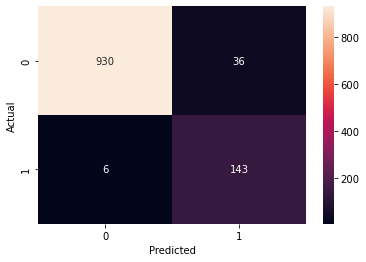

In [73]:
cm = confusion_matrix(y_test, np.where(y_pred>0.5,1,0))

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()